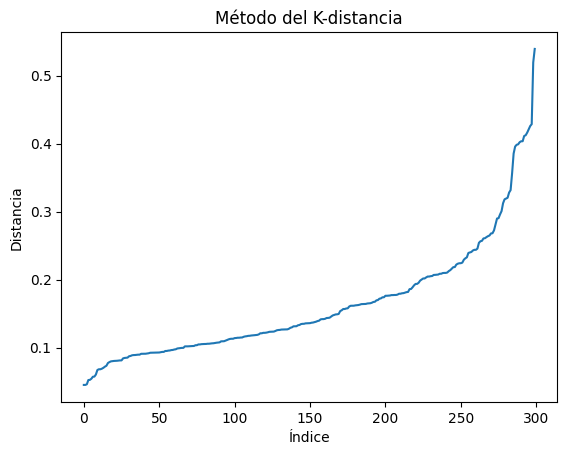

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

# Datos de ejemplo
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X_scaled = StandardScaler().fit_transform(X)

# Calcular distancias k-vecinas más cercanas
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Distancia de la k-ésima vecindad más cercana
distances = np.sort(distances[:, 4], axis=0)

plt.plot(distances)
plt.title('Método del K-distancia')
plt.xlabel('Índice')
plt.ylabel('Distancia')
plt.show()


In [ ]:
## La curva (codo) nos indica el valor de epsilón adecuado, el cual sera usado en el modelo DBSCAN (eps=0.3)

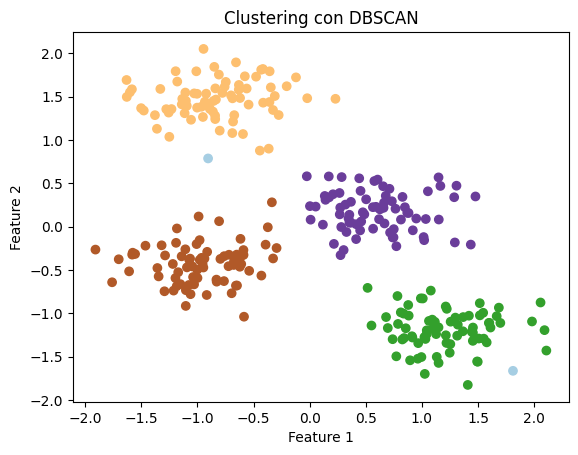

In [4]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2)
clusters = dbscan.fit_predict(X_scaled)

# Visualización
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='Paired', marker='o')
plt.title('Clustering con DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()